In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.12.0


In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [8]:
print(type(fashion_mnist))

<class 'module'>


In [9]:
train, test = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [16]:
train_images, train_labels = train[0],train[1]
test_images, test_labels = test[0],test[1]

In [17]:
print(len(set(train_labels)))
print(len(set(test_labels)))

10
10


In [19]:
classes = list(set(test_labels))
classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [21]:
print(train_images.shape)

(60000, 28, 28)


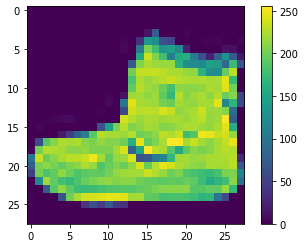

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [25]:
# normalize
train_images = train_images/ 255.0
test_images = test_images /255.0

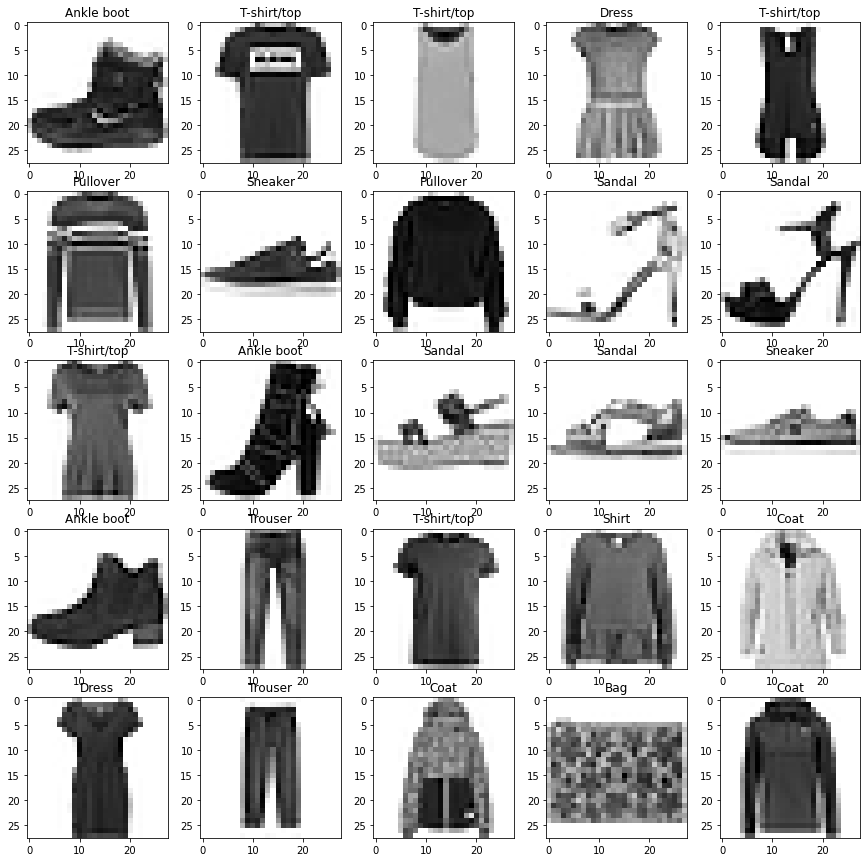

In [26]:
plt.figure(figsize = (15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.title(class_names[train_labels[i]])
    

In [27]:
# Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

In [28]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [30]:
model.fit(train_images,train_labels,epochs = 5)

Epoch 1/5


C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 3s 2ms/step - loss: 0.4932 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3695 - accuracy: 0.8666
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3350 - accuracy: 0.8778
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3108 - accuracy: 0.8864
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2952 - accuracy: 0.8896


In [31]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels, verbose = 2)
print(test_accuracy)

313/313 - 1s - loss: 0.3454 - accuracy: 0.8769 - 508ms/epoch - 2ms/step
0.8769000172615051


In [32]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [33]:
predictions[0]

array([1.2889565e-06, 1.5529512e-06, 3.4193331e-06, 1.6164270e-06,
       1.7072283e-06, 1.2412413e-02, 8.4133926e-06, 6.2021120e-03,
       1.4767653e-05, 9.8135275e-01], dtype=float32)

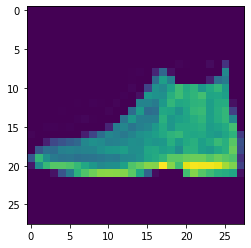

In [34]:
plt.imshow(test_images[0])

In [38]:
print(class_names[np.argmax(predictions[0])])

Ankle boot
